In [1]:
import cv2
import os


# Carpeta con los videos a los que se les quiere extraer los frames
folder_path = (r'/Users/alejandralemus/Documents/pipp_20241220_105253/Videos')
filenames = [file for file in os.listdir(folder_path)]

for filename in filenames:
    filename = filename[:-4]
    print(filename)
    
    # Ruta del video
    video_path = (f"videos/{filename}.avi") # Asume que el video está en una carpeta llamada videos

    # Extraer el nombre del archivo sin la extensión para usar como nombre de la carpeta
    video_name = os.path.splitext(os.path.basename(video_path))[0]

    # Crear una carpeta con el nombre del video si no existe
    output_folder = os.path.join("frames", video_name)
    if not os.path.exists(output_folder):
        try:
            os.makedirs(output_folder)
        except OSError:
            print("Error: Creating directory of data")
            exit(1)

    # Abrir el video
    cam = cv2.VideoCapture(video_path)

    # Inicializar el contador de frames
    currentframe = 0

    print(f"\n Inicio de la extracción de frames")

    while True:
        # Leer un frame del video
        ret, frame = cam.read()

        if ret:
            # Si hay frames disponibles, continuar creando imágenes
            name = os.path.join(output_folder, f"frame{currentframe}.jpg")
            # print(f"Creating... {name}")

            # Guardar la imagen extraída
            cv2.imwrite(name, frame)

            # Incrementar el contador de frames
            currentframe += 1
        else:
            print("\n Extracción de frames completada")
            print(f"\n {currentframe} frames generados")
            print(f"          ....            ")
            break

    # Liberar todos los recursos y cerrar ventanas una vez terminado
    cam.release()
    cv2.destroyAllWindows()

FileNotFoundError: [Errno 2] No such file or directory: '/Users/alejandralemus/Documents/pipp_20241220_105253/Videos'

In [1]:
Dhole = 42  # diametro de la apertura  en mm
dsep = 144  # diametro de la separacion de las aperturas en mm
lamb = 0.0005  # longitud de onda en micrometros (mm)

In [2]:
"""________________Distance_IMG______________
Programa que construye el histograma de frecuencias de la separación 
entre dos "spots" (objetos) en el DIMM."""

"""_________________Libraries________________________"""
import cv2
import os
import glob
import numpy as np
from scipy.stats import norm
from scipy.spatial import distance as dist
from astropy.stats import mad_std
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import re
from tqdm import tqdm

In [3]:
# Definir una funcion para extraer el numero del frame del nombre del archivo
def extract_frame_number(filename):
    match = re.search(r'frame(\d+)\.jpg', filename)
    return int(match.group(1)) if match else -1

"""__________________________________________________"""

"""_____________________SCALE________________________"""

scale_size = 1.03  # segundos de arco por px ('' /px)

In [8]:
import cv2
import numpy as np
from scipy.spatial import distance as dist
import matplotlib.pyplot as plt
from skimage.measure import regionprops, label

def identify_stars_and_distance(image_path, plot=False, show_steps=False, threshold_value=65, min_area=10):
    #treshold_value = 65
    # Cargar imagen en escala de grises
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Suavizar la imagen para reducir el ruido
    image_blurred = cv2.GaussianBlur(image, (5, 5), 0)

    # Umbralizar la imagen
    _, thresh = cv2.threshold(image_blurred, threshold_value, 255, cv2.THRESH_BINARY)

    # Mostrar la imagen umbralizada para depuración
    if show_steps:
        plt.imshow(thresh, cmap='gray')
        plt.title(f"Imagen binarizada (umbral = {threshold_value})")
        plt.axis('off')
        plt.show()

    # Encontrar contornos para identificar regiones de interés
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Filtrar contornos por tamaño mínimo
    filtered_contours = [c for c in contours if cv2.contourArea(c) > min_area]

    if show_steps:
        print(f"Se detectaron {len(filtered_contours)} regiones de interés.")

    # Crear una máscara para analizar cada contorno por separado
    star_centers = []
    for contour in filtered_contours:
        # Crear una máscara para la región actual
        mask = np.zeros_like(image_blurred)
        cv2.drawContours(mask, [contour], -1, 255, thickness=cv2.FILLED)

        # Extraer propiedades de la región
        labeled_mask = label(mask)
        properties = regionprops(labeled_mask, intensity_image=image_blurred)

        # Encontrar el área más compacta o con mayor intensidad
        brightest_region = max(properties, key=lambda r: r.max_intensity)

        # Obtener el centroide del núcleo más brillante
        cY, cX = brightest_region.weighted_centroid
        star_centers.append((int(cX), int(cY)))

    # Mostrar los núcleos detectados
    if show_steps:
        color_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
        for center in star_centers:
            cv2.circle(color_image, (center[0], center[1]), 5, (0, 0, 255), -1)

        plt.imshow(cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB))
        plt.title("Núcleos detectados")
        plt.axis('off')
        plt.show()

    # Si se detectan exactamente dos núcleos, calcular la distancia
    if len(star_centers) == 2:
        # Calcular la distancia entre los dos puntos más brillantes
        pixel_distance = dist.euclidean(star_centers[0], star_centers[1])

        if plot:
            # Dibujar la línea entre los núcleos detectados
            plt.imshow(image, cmap='gray')
            plt.plot([star_centers[0][0], star_centers[1][0]],
                     [star_centers[0][1], star_centers[1][1]], 'ro-', mfc='none')
            plt.scatter([p[0] for p in star_centers], [p[1] for p in star_centers], c='blue', s=50)
            plt.tight_layout()
            plt.axis('off')
            plt.title(f"Distancia entre núcleos: {pixel_distance:.2f} píxeles")
            plt.show()

        return pixel_distance

    # Si hay más o menos de dos núcleos, mostrar mensaje y no calcular la distancia
    #elif len(star_centers) > 2:
        #print(f"Se detectaron {len(star_centers)} núcleos. El cálculo no se realizará.")
    #else:
        #print("No se encontraron suficientes núcleos brillantes.")

    return 0


.DS_Store
Su carpeta no tiene archivos .jpg
No se encontraron suficientes distancias válidas para el ajuste.
2024-12-19-Aldebaran_19_09
2024-12-19-Aldebaran_19_27
2024-12-19-Aldebaran_19_32
2024-12-19-Capella_19_06
No se encontraron suficientes distancias válidas para el ajuste.
2024-12-19-Hamal_20_04
2024-12-19-Hamal_20_07


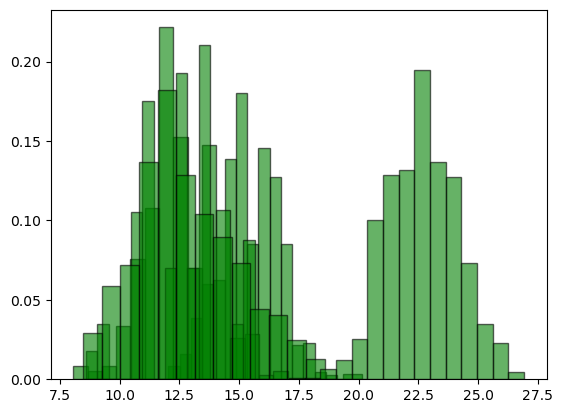

In [9]:
# Nueva Función principal
"""_____________________MAIN_________________________"""
folder = (r'/Users/alejandralemus/Documents/pipp_20241220_105253/frames')
files = np.sort([file for file in os.listdir(folder)])

values = np.zeros((len(files), 6), dtype=object)
ff = -1

seeing = []
sigma = []

for filename in files:
    ff += 1

    # Abrir carpeta donde se encuentran los frames del video
    carpeta = f"{folder}/{filename}"
    print(filename)

    # Busqueda de los archivos .jpg
    archivos = glob.glob(carpeta + r"/*.jpg")

    # Ordenar los archivos numéricamente por el número de frame en el nombre
    archivos.sort(key=extract_frame_number)

    # Definir los frames que se procesarán
    start = int(len(archivos) * 0.3)
    end = int(len(archivos) * 0.8)

    nombres = []
    for j in archivos:
        if carpeta in j:
            nombres.append(j.replace(carpeta, ""))

    if nombres != []:
        l = len(nombres)
        # print(f"Procesando {l} archivos .jpg del {start} al {end}")
    else:
        print("Su carpeta no tiene archivos .jpg")

    distances = []
    plotit = False

    for k in range(start, end):
        # Usar la función en un frame
        dis = identify_stars_and_distance(archivos[k], plotit)
        distances.append(dis)

        if dis != 0:
            plotit = False

    # Convertir las distancias en un array de NumPy
    distances = np.array(distances)

    # Filtrar los ceros antes del ajuste
    distances_filtered = distances[np.where(distances != 0)]

    # Guardar las distancias en un archivo
    np.savetxt(f"{filename}.dat", distances_filtered, fmt="%.6f", header="Distancias entre estrellas (arcsec)")

    if len(distances_filtered) > 0:
        # Ajuste de los datos a una distribución normal
        mu, std = norm.fit(distances_filtered)

        # Normalizar los valores del histograma
        weights = np.ones_like(distances_filtered) / len(distances_filtered)

        # Graficar el histograma con las distancias filtradas
        count, bins, ignored = plt.hist(distances_filtered, weights=weights, bins=15, alpha=0.6, color="g", edgecolor="black")

        # Graficar la función de densidad de probabilidad (PDF) ajustada
        #xmin, xmax = plt.xlim()
        #x = np.linspace(xmin, xmax, 100)
        #p = norm.pdf(x, mu, std)

        # Normalizar la PDF para que se ajuste al histograma
        #bin_width = bins[1] - bins[0]
        #p_normalized = p * bin_width
        #plt.plot(x, p_normalized, "k", linewidth=2)

        # Mostrar los valores de mu y sigma
        #print(f"Media (mu): {mu:.3f}, Desviación estándar (σ): {std:.3f}")
        #print(f"En la distribución normal el FWHM está dado por (2.355 * σ): {2.355 * std:.3F}")

        # Grafico
        #plt.title(r"$\mathrm{Histograma\ de\ distancias\ entre\ estrellas:}\ \mu=%.3f,\ \sigma=%.3f,\ \mathrm{FWHM}=%.3f$" % (mu, std, 2.355 * std))
        #plt.xlabel("Distancia entre los centroides (arcsec)")
        #plt.ylabel("Frecuencia")
        #plt.show()

        # Parámetro de Fried
        r_0 = (((0.358 * (lamb / std) ** 2) ** 3) / Dhole) ** (1 / 5)
        #print(f"El parámetro de Fried es :{r_0}")

        # Seeing sin corregir
        FWHM = 0.98 * lamb / r_0
        seeing.append((filename, FWHM))
        sigma.append((filename, std))
        #print(f"El valor del Seeing es: {FWHM:.3f}")
    else:
        print("No se encontraron suficientes distancias válidas para el ajuste.")


In [10]:
sigma

[('2024-12-19-Aldebaran_19_09', 1.227993398708308),
 ('2024-12-19-Aldebaran_19_27', 1.4205405598985779),
 ('2024-12-19-Aldebaran_19_32', 1.590179305695766),
 ('2024-12-19-Hamal_20_04', 2.076161961579149),
 ('2024-12-19-Hamal_20_07', 1.4624284592063468)]